In [1]:
#import seaborn as sns
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

### something to remove a warninig ### arghh
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:
year = 2015
with Dataset(f'../../netcdf/{year}/rbr.nc', 'r') as nc:
    
    #print(nc.variables)
    #print(nc['TEMP'])
    #print()
    #print(nc['DEPTH'])
    
    #print(nc['DEPTH'][:])
    n_depths = len(nc['DEPTH'][:])
    depth_rbr = np.array(nc['DEPTH'][:])
    time = np.array(nc['TIME'][:])
    
    temp = np.array(nc['TEMP'][:])
    
time = pd.to_datetime(time, unit='D', origin='1950-01-01 00:00')
df = pd.DataFrame(temp, index = time, columns=depth_rbr)
means_rbr = df.mean().values 

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


In [3]:
df.head()

,800.0,1100.0,1200.0,1300.0,1400.0,1490.0,1540.0,1580.0,1620.0,1660.0
2014-07-29 19:09:59.999990400,9.6494,7.2754,6.4862,6.0981,5.8325,5.4969,5.2323,5.1914,4.9633,4.8976
2014-07-29 19:10:14.999980799,9.6068,7.0359,6.4043,6.0284,5.7819,5.4451,5.1548,5.1159,4.9251,4.8761
2014-07-29 19:10:29.999971200,9.6042,6.9030,6.3854,6.0147,5.7542,5.4278,5.1217,5.0700,4.9076,4.8649
2014-07-29 19:10:44.999961600,9.6017,6.9065,6.3770,6.0082,5.7376,5.4191,5.1029,5.0411,4.8983,4.8595
2014-07-29 19:10:59.999952000,9.6009,6.9101,6.3706,6.0026,5.7251,5.4137,5.0905,5.0160,4.8920,4.8561


# Solving single .nc file SBE 

In [7]:
year = 2011
with Dataset(f'../../netcdf/{year}/sbe_1000m.nc', 'r') as nc:
    
    #print(nc.variables)
    #print(nc['TEMP'])
    #print()
    #print(nc['DEPTH'])
    
    #print(nc['DEPTH'][:])
    #n_depths = len(nc['DEPTH'][:])
    depth_sbe = np.array(nc['DEPTH'][:])
    time = np.array(nc['TIME'][:])
    
    temp = np.array(nc['TEMP'][:])
    sal = np.array(nc['PSAL'][:])
    
time = pd.to_datetime(time, unit='D', origin='1950-01-01 00:00')
df_1 = pd.DataFrame({'temp':temp, 'sal':sal}, index = time)
#means_sbe = df.mean().values 

In [10]:
depth_sbe

array([1688])

In [28]:
year = 2011
with Dataset(f'../../netcdf/{year}/sbe_1688m.nc', 'r') as nc:
    
    #print(nc.variables)
    #print(nc['TEMP'])
    #print()
    #print(nc['DEPTH'])
    
    #print(nc['DEPTH'][:])
    #n_depths = len(nc['DEPTH'][:])
    depth_sbe = np.array(nc['DEPTH'][:])
    time = np.array(nc['TIME'][:])
    
    temp = np.array(nc['TEMP'][:])
    sal = np.array(nc['PSAL'][:])
    
time = pd.to_datetime(time, unit='D', origin='1950-01-01 00:00')
df_2 = pd.DataFrame({'temp':temp, 'sal':sal}, index = time)

In [34]:
sal = pd.DataFrame()

In [35]:
sal = pd.concat([sal,df_2.sal], axis=1)

In [37]:
sal.columns=['1000']

In [38]:
sal

,1000
2010-10-15 13:00:01.000022399,35.219177
2010-10-15 13:06:00.999964800,35.217335
2010-10-15 13:12:00.999993600,35.215832
2010-10-15 13:18:01.000022400,35.218773
2010-10-15 13:24:00.999964799,35.217987
...,...
2011-11-02 02:30:01.000022400,35.218304
2011-11-02 02:36:00.999964800,35.218872
2011-11-02 02:42:00.999993600,35.217224
2011-11-02 02:48:01.000022400,35.217697


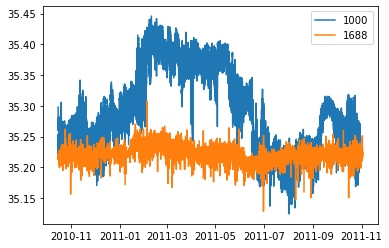

In [26]:
plt.plot(sal[1000], label='1000')
plt.plot(sal[1688], label='1688')
plt.legend()

# Ridge plot 

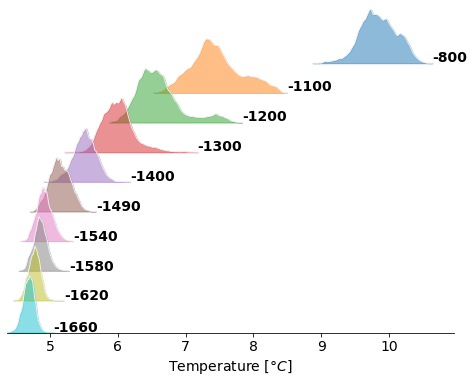

In [238]:
plt.rcParams.update({'font.size': 14})
val_min_global = df.min().min()
#val_max = df.max().max()

numero_bins = 35
nrows = len(df.keys())
colors = plt.rcParams["axes.prop_cycle"]()
fig, axes = plt.subplots(nrows,  sharex=True, figsize=(8,6))

for i, key in enumerate(df.keys()):
    val_min = df[key].min()
    val_max = df[key].max()
    x_values = np.linspace(val_min, val_max, 128)
    
    c = next(colors)['color']
    kernel = stats.gaussian_kde(df[key].dropna())
    kde = kernel(x_values)
    
    axes[i].plot(x_values, kde, color="#f0f0f0", lw=1)
    axes[i].fill_between(x_values, kde, color=c, alpha=0.5)
    rect = axes[i].patch
    rect.set_alpha(0)
    axes[i].tick_params(left=False, labelleft=False)

    if i == len(df.keys())-1:
        axes[i].tick_params(bottom=True, left=False, labelleft=False)
        spines = ["top","right","left"]
        axes[i].set_ylim(-0.05,)
        axes[i].set_xlim(val_min_global,)
        axes[i].set_xlabel(r'Temperature [$\degree C$]')
    
    else:
        axes[i].tick_params(bottom=False, left=False, labelleft=False)
        spines = ["top","right","left","bottom"]
        
    for s in spines:
        axes[i].spines[s].set_visible(False)

    depth_label = str(-int(key))
    axes[i].text(val_max, 0.05, depth_label, fontweight="bold", fontsize=14, ha="left")

plt.subplots_adjust(hspace=-0.5)

#### custom color discrete 

In [191]:
a = plt.cm.get_cmap(name='magma', lut=2)

In [112]:
a(4)

(0.987053, 0.991438, 0.749504, 1.0)

# Guillaume's idea

switched the histogram curve for a Kernel density estimation curve because it looks nicer.

In [150]:
#hist_s = []
#bins_s = []
# for i, key in enumerate(levels):
    #h, b = np.histogram(df[key], 50, density=True)
    #bb = 0.5*(b[1:] + b[:-1])
    #hist_s.append(h)
    #bins_s.append(bb)

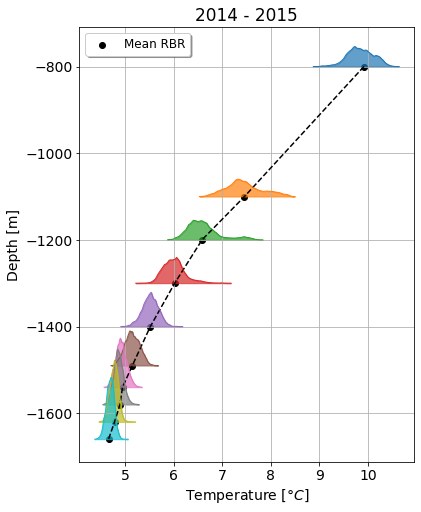

In [243]:
levels = df.keys()
means = df.mean().values 

plt.figure(figsize=(6,8))
plt.plot(means, -levels, 'k--')
plt.scatter(means_rbr, -depth_rbr, marker='o', c='black', label='Mean RBR')

colors = plt.rcParams["axes.prop_cycle"]()

for i, key in enumerate(levels):
    c = next(colors)['color']
    val_min = df[key].min()
    val_max = df[key].max()
    x_values = np.linspace(val_min, val_max, 64)
    base_line = np.zeros_like(x_values) - levels[i]
    
    kernel = stats.gaussian_kde(df[key].dropna())
    kde = kernel(x_values)*30 - levels[i]
    
    plt.plot(x_values, kde, color=c, lw=1)
    plt.fill_between(x_values, base_line, kde, alpha=0.7, color=c)

plt.xlabel(r'Temperature [$\degree C$]')
plt.ylabel('Depth [m]')
plt.title(f'{year-1} - {year}')
plt.grid()
plt.legend(fontsize=12, shadow=True)

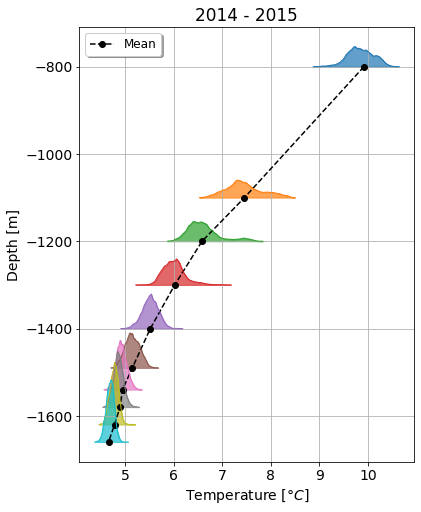

In [244]:
levels = df.keys()
means = df.mean().values 

fig, ax = plt.subplots(1, figsize=(6,8))
ax.plot(means, -levels, 'ko--', label='Mean')

colors = plt.rcParams["axes.prop_cycle"]()

for i, key in enumerate(levels):
    c = next(colors)['color']
    val_min = df[key].min()
    val_max = df[key].max()
    x_values = np.linspace(val_min, val_max, 64)
    base_line = np.zeros_like(x_values) - levels[i]

    kernel = stats.gaussian_kde(df[key].dropna())
    kde = kernel(x_values)*30 - levels[i]

    ax.plot(x_values, kde, color=c, lw=1)
    ax.fill_between(x_values, base_line, kde, alpha=0.7, color=c)

ax.set_xlabel(r'Temperature [$\degree C$]')
ax.set_ylabel('Depth [m]')
ax.set_title(f'{year-1} - {year}')
ax.grid()
ax.legend(fontsize=12, shadow=True)

## comparing years

In [2]:
depths_global = {}

for y in range(2011,2020):
    with Dataset(f'../../netcdf/{y}/rbr.nc', 'r') as nc:
        depths_global[y] = np.array(nc['DEPTH'][:])


In [3]:
depths_global

{2011: array([1200., 1300., 1400.], dtype=float32),
 2012: array([1100., 1200., 1300., 1400., 1490., 1540., 1580., 1620., 1660.],
       dtype=float32),
 2013: array([1100., 1200., 1300., 1400., 1500., 1540., 1580., 1620., 1660.],
       dtype=float32),
 2014: array([ 800., 1100., 1200., 1300., 1400., 1540., 1580., 1620., 1660.],
       dtype=float32),
 2015: array([ 800., 1100., 1200., 1300., 1400., 1490., 1540., 1580., 1620.,
        1660.], dtype=float32),
 2016: array([ 800., 1200., 1300., 1400., 1540., 1580., 1620., 1660.],
       dtype=float32),
 2017: array([ 780.,  943., 1190., 1289., 1382., 1458., 1507., 1557., 1606.,
        1665.], dtype=float32),
 2018: array([ 800.,  900., 1200., 1300., 1350., 1490., 1540., 1580., 1620.,
        1660.], dtype=float32),
 2019: array([ 800.,  900., 1200., 1300., 1350., 1490., 1540., 1580., 1620.,
        1660.], dtype=float32)}

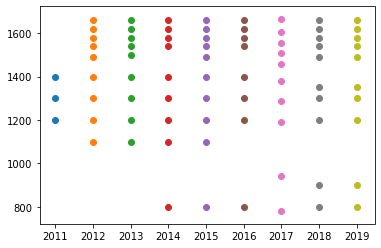

In [4]:
for y in range(2011,2020):
    x = np.zeros(len(depths_global[y])) + y
    plt.scatter(x, depths_global[y])

In [48]:
temp_1200 = {}
i_level = 1200
for y in range(2011,2020):
    with Dataset(f'../../netcdf/{y}/rbr.nc', 'r') as nc:
        depth_y = np.array(nc['DEPTH'][:])
        print(y, depth_y)
        
        idx = np.where(depth_y==i_level)[0]
                
        print(y, idx)
        for i in idx:
            temp_1200[y] = np.array(nc['TEMP'][:,i])

with Dataset(f'../../netcdf/{2017}/rbr.nc', 'r') as nc:

2011 [1200. 1300. 1400.]
2011 [0]
2012 [1100. 1200. 1300. 1400. 1490. 1540. 1580. 1620. 1660.]
2012 [1]
2013 [1100. 1200. 1300. 1400. 1500. 1540. 1580. 1620. 1660.]
2013 [1]
2014 [ 800. 1100. 1200. 1300. 1400. 1540. 1580. 1620. 1660.]
2014 [2]


/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


2015 [ 800. 1100. 1200. 1300. 1400. 1490. 1540. 1580. 1620. 1660.]
2015 [2]
2016 [ 800. 1200. 1300. 1400. 1540. 1580. 1620. 1660.]
2016 [1]
2017 [ 780.  943. 1190. 1289. 1382. 1458. 1507. 1557. 1606. 1665.]
2017 []
2018 [ 800.  900. 1200. 1300. 1350. 1490. 1540. 1580. 1620. 1660.]
2018 [2]
2019 [ 800.  900. 1200. 1300. 1350. 1490. 1540. 1580. 1620. 1660.]
2019 [2]


In [49]:
temp_1200 

{2011: array([6.4187, 6.4166, 6.4154, ..., 6.3703, 6.4398, 6.4898], dtype=float32),
 2012: array([5.8728, 5.8736, 5.8744, ..., 6.7024, 6.7026, 6.7027], dtype=float32),
 2013: array([6.6832, 6.6775, 6.6757, ..., 6.3156, 6.316 , 6.3171], dtype=float32),
 2014: array([6.8705, 6.8608, 6.8561, ...,    nan,    nan,    nan], dtype=float32),
 2015: array([6.4862, 6.4043, 6.3854, ..., 6.736 , 6.7292, 6.7255], dtype=float32),
 2016: array([6.9144, 6.9141, 6.9137, ...,    nan,    nan,    nan], dtype=float32),
 2018: array([7.4956193, 7.4152355, 7.2998476, ..., 8.3701935, 8.6047945,
        8.548303 ], dtype=float32),
 2019: array([6.8253374, 6.8259063, 6.826112 , ..., 6.881129 , 6.98888  ,
        7.07033  ], dtype=float32)}

In [136]:
def ridge_plot(data, xlabel, bins=128, h_space=-0.5, alpha=1, figsize=(8,6)):

    nrows = len(data.keys())
    labels = list(temp_1200.keys())
    colors = plt.rcParams["axes.prop_cycle"]()
    
    fig, axes = plt.subplots(nrows,  sharex=True, figsize=figsize)
    
    min_glob = 999

    for i, key in enumerate(data.keys()):
        val_min = data[key][~np.isnan(data[key])].min()
        val_max = data[key][~np.isnan(data[key])].max()
        
        if val_min < min_glob:
            min_glob = val_min
    
        x_values = np.linspace(val_min, val_max, bins)

        c = next(colors)['color']
        
        kernel = stats.gaussian_kde(data[key][~np.isnan(data[key])])
        kde = kernel(x_values)

        axes[i].plot(x_values, kde, color="#f0f0f0", lw=1)
        
        axes[i].fill_between(x_values, kde, color=c, alpha=alpha)
        rect = axes[i].patch
        rect.set_alpha(0)
        axes[i].tick_params(left=False, labelleft=False)

        if i == len(data.keys())-1:
            axes[i].tick_params(bottom=True, left=False, labelleft=False)
            spines = ["top","right","left"]
            axes[i].set_ylim(-0.05,)
            axes[i].set_xlim(min_glob,)
            axes[i].set_xlabel(xlabel, fontsize=14)

        else:
            axes[i].tick_params(bottom=False, left=False, labelleft=False)
            spines = ["top","right","left","bottom"]

        for s in spines:
            axes[i].spines[s].set_visible(False)

        depth_label = str(int(key))
        
    for j,l in enumerate(data.keys()): 
        axes[j].text(min_glob, 0.05, labels[j], fontweight="bold", fontsize=13, ha="right")

    plt.subplots_adjust(hspace=-0.5)


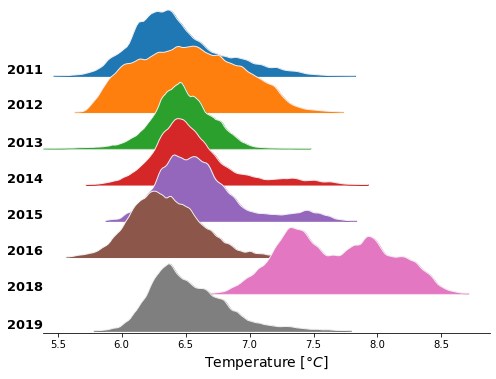

In [137]:
ridge_plot(temp_1200, r'Temperature [$\degree C$]', alpha=1)